In [1]:
"""
Consolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)
"""

'\nConsolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)\n'

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

# Load DFallPa dataset

In [ ]:

# this is the path to the dataset
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230615-trial-kilosort_if_exists-norm=None-combine=True.pkl"
DFallpa = pd.read_pickle(path)


In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
dflab["taskconfig_shploc_SHSEM"].value_counts()
#  'taskconfig_loc',
#  'taskconfig_shp',
#  'taskconfig_shp_SHSEM',
#  'taskconfig_shploc',
#  'taskconfig_shploc_SHSEM',


In [ ]:
##### Method: loading functrion

In [3]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [4]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper()


# Quick look at DFallpa

In [ ]:
# This holds data across multiple brain regions (the "bregion" column)
# -- "event", the event during trial which this data is aligned to
# -- "twind", time extracted aligned to that event, in seconds
# -- pa, PopAnal class holding neurla data and behavioral features.
# -- pa_x_shape, shape of neural data, in (chans, trials, times)
# Ingore the "which_level"

display(DFallpa)


In [ ]:
# Pull out a single pa
pa = DFallpa["pa"].values[17]


In [ ]:
# This holds data for a single brain area
# The main data is here, in pa.X, an array with dimensions (channels, trials, timepoints)
print(pa.X.shape)

# The labels for channels, trials, and times:
print("channels: ", pa.Chans)
print("trials: ", pa.Trials)
print("timepoints: ", pa.Times)




In [ ]:
# Each trials has associated "features", saved here, where each row of this dataframe matches a trial
pa.Xlabels["trials"]


In [ ]:
# e.g., to get the features for trial i, do this
trial = 10
features = pa.Xlabels["trials"].iloc[trial]
display(features)

# Preprocess methods

### (1a) FR normalization

##### Method 1 - each PA normalize independently

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### (1b) FR normalization, apply across events


In [5]:

# Prune to chans that are common across pa for each bregion (intersection of chans)|
dfpa_match_chans_across_pa_each_bregion(DFallpa)


M1  -- n chans final:  38
PMv  -- n chans final:  55
PMd  -- n chans final:  53
dlPFC  -- n chans final:  20
vlPFC  -- n chans final:  25
FP  -- n chans final:  32
SMA  -- n chans final:  52
preSMA  -- n chans final:  39


##### Method 2 - Concat events (for each bregion) and normalize all same way


In [6]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
dfpa_concat_normalize_fr_split_multbregion(DFallpa)


Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA


##### Method 3 - concat events (flexible version, only constrianed to have same n chans across PA)

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion_flex
# fr_mean_subtract_method = "across_time_bins"
fr_mean_subtract_method = "each_time_bin"
PLOT=False

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

dfpa_concat_normalize_fr_split_multbregion_flex(DFallpa, fr_mean_subtract_method, PLOT)

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

### PCA

##### Run a single PCA across all events

In [7]:

from neuralmonkey.classes.population_mult import dfpa_concat_pca_split_multbregion
dfpa_concat_pca_split_multbregion(DFallpa)

Running ..  M1
Doing PCA
Running ..  PMv
Doing PCA
Running ..  PMd
Doing PCA
Running ..  dlPFC
Doing PCA
Running ..  vlPFC
Doing PCA
Running ..  FP
Doing PCA
Running ..  SMA
Doing PCA
Running ..  preSMA
Doing PCA


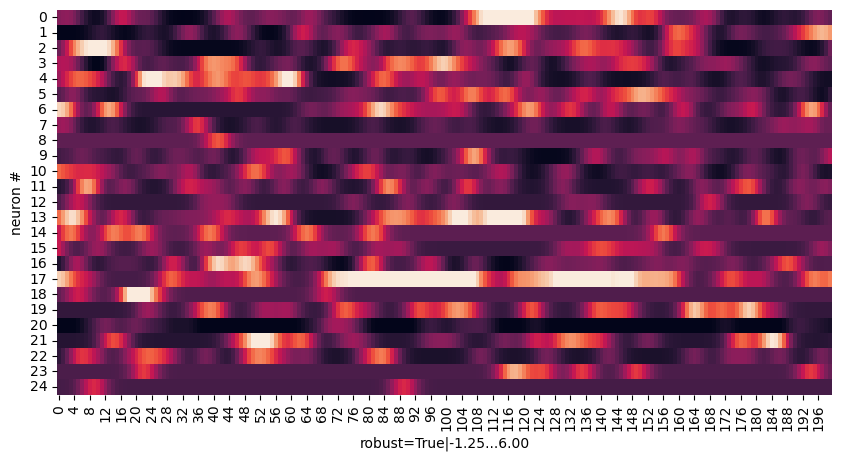

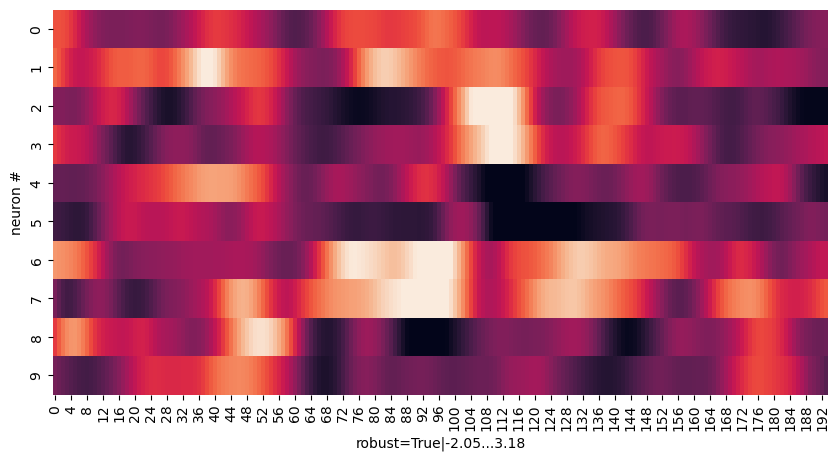

In [10]:
# Look at raw and PCA data for an example PA
ind = 20
pa = DFallpa["pa"].values[ind]
pa_pca = DFallpa["pa_pca"].values[ind]

pa.plotNeurHeat(0)
pa_pca.plotNeurHeat(0)


In [12]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape,pa_pca
0,trial,03_samp,M1,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
1,trial,03_samp,PMv,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(55, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
2,trial,03_samp,PMd,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(53, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
3,trial,03_samp,dlPFC,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(20, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
4,trial,03_samp,vlPFC,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(25, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
5,trial,03_samp,FP,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
6,trial,03_samp,SMA,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(52, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
7,trial,03_samp,preSMA,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(39, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
8,trial,05_first_raise,M1,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...
9,trial,05_first_raise,PMv,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(55, 758, 200)",<neuralmonkey.classes.population.PopAnal objec...


In [13]:
### [Optionally] get a single PA concatted across events (for each bregion)
from neuralmonkey.classes.population_mult import dfpa_group_and_split
DFallpaConcat = dfpa_group_and_split(DFallpa, ["event"], concat_dim="times", pa_column="pa_pca")


### Plot strokes (behavior) on this trial, overlaid on the task image

In [ ]:
dflab = pa.Xlabels["trials"]

Tkbeh_stkbeh = dflab.iloc[trial]["Tkbeh_stkbeh"]
Tkbeh_stktask = dflab.iloc[trial]["Tkbeh_stktask"]

strokes_beh = [tk["Prim"].Stroke() for tk in Tkbeh_stkbeh.Tokens]
strokes_task = [tk["Prim"].Stroke() for tk in Tkbeh_stktask.Tokens]

fig, ax = plt.subplots()
from pythonlib.drawmodel.strokePlots import plotDatStrokesWrapper, plotDatStrokes

# # Plot the task strokes
# plotDatStrokes(strokes_task, ax, mark_stroke_onset=False, color="k")

# # Overlay each beh stroke
# plotDatStrokes(strokes_beh, ax, mark_stroke_onset=True, add_stroke_number=True)

# Plot the task strokes
plotDatStrokes(strokes_task, ax, clean_task=True)

# Overlay each beh stroke
plotDatStrokes(strokes_beh, ax, clean_ordered_ordinal=True)


##### PA has many helper functions to preprocess and plot the data. 

In [ ]:
# Pick a random channel
chan = pa.Chans[4]


In [ ]:
# Plot heatmap of data for a single trial
trial = pa.Trials[0]
pa.plotNeurHeat(trial)

In [ ]:
# Plot average acrtivit for each shape
fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan)


fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan, plot_indiv=True)


In [ ]:
# Example processing. Here this picks out just a smaller time winodw
print("Times, before slicing: ", pa.Times)

twind = [-0.35, -0.3] # window: to only keep times within this window
pa_slice = pa.slice_by_dim_values_wrapper("times", twind)

print("Times, after slicing:", pa_slice.Times)

In [ ]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


In [ ]:
# 2. binning time windows
binsize = 0.1
binslide = 0.02
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


# Decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). Could also use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

### Make sure to normalize PA before running any modeling on it:

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

In [ ]:
# list_panorm = []
# for pa in DFallpa["pa"].tolist():
#     from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
#     PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None, DO_AGG_TRIALS=False)
#     list_panorm.append(PAnorm)
# DFallpa["pa"] = list_panorm
# if "pa_norm" in DFallpa.columns:
#     del DFallpa["pa_norm"]

### PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### 1) Default: Time-resolved decoding

In [ ]:
# Simplest model, simply try to decode a single variable at each time bin, without caring about other possibly correlated variables.

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/decoding"
import os

In [ ]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/1_time_resolved"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

n_min_trials = 6

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_singlevar, decodewrapouterloop_categorical_timeresolved

# list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]
# list_vars_decode = ["seqc_0_shape"]
list_vars_decode = ["seqc_0_shape"]
# list_vars_decode = ["seqc_2_shape"]
# list_vars_decode = ["shape_is_novel_all"]

# PARAMS
time_bin_size = 0.2 # binsize, to average over to get population vector of neural activity
slide = 0.2 # to slide the bin.
max_nsplits = 2 # n times to do cross-validation.

DFRES = decodewrapouterloop_categorical_timeresolved(DFallpa, list_vars_decode, SAVEDIR, time_bin_size, slide, n_min_trials,
                                                     max_nsplits=max_nsplits)


### 2) Cross-condition decoding

In [ ]:
# Ask whether a decoder for variable X, trained on each level of variable Y, can generalize to the other levels of variable Y.

In [ ]:
# For each time bin, decode shape genearlizing across location

SAVEDIR = f"{SAVEDIR_ANALYSIS}/2_cross_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

filtdict = None
separate_by_task_kind = True

# PARAMS

# # Context
# list_var_decode = [
#     "seqc_0_shape",
#     "shape-fixation",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
# ]
# list_vars_conj = [
#     ["shape-macrosaccade-index", "seqc_0_loc_on_clust", "shape-fixation", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "loc-fixation", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
#     ["shape-macrosaccade-index", "seqc_0_shape", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
#     ["shape-macrosaccade-index", "shape-fixation", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "shape-fixation", "seqc_0_loc_on_clust", "task_kind"],
# ]
# Context
list_var_decode = [
    "seqc_0_shape",
    "seqc_0_loc",
]
list_vars_conj = [
    ["task_kind", "seqc_0_loc"],
    ["task_kind", "seqc_0_shape"],
]

time_bin_size = 0.2
slide = 0.2
subtract_mean_vars_conj = False
DFRES = decodewrapouterloop_categorical_timeresolved_cross_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                     SAVEDIR, time_bin_size=time_bin_size, slide=slide,
                                                     subtract_mean_vars_conj=subtract_mean_vars_conj,
                                                                     filtdict=filtdict,
                                                                     separate_by_task_kind=separate_by_task_kind)



### 2b) Within-condition decoding. Separate decoder for each level of other var (then take average over decoders). Useful to controlling for variables

In [ ]:
# Decode variable X by building and scoring separate decoders conditioned on each level of variable Y.

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_timeresolved_within_condition

SAVEDIR = f"{SAVEDIR_ANALYSIS}/3_within_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# PARAMS
separate_by_task_kind = True

# RUns
max_nsplits = 2
time_bin_size = 0.2
slide = 0.2

# PARAMS
DFRES = decodewrapouterloop_categorical_timeresolved_within_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                    SAVEDIR, time_bin_size=time_bin_size, slide=slide, filtdict=filtdict,
                                                                      separate_by_task_kind=separate_by_task_kind)


# Dim reduction and State space plots

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/Diego_230630"

### Plot scalar values (time-mean within twindow)

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import matplotlib.pyplot as plt
import os
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data

### USER PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
umap_n_neighbors = 45
pca_frac_var_keep = 0.8
n_min_per_levo= 5
list_twind_overall = [
    [-0.3, 0.0],
    [0.0, 0.3]
]
# METHOD = "umap"
METHOD = "umap"
list_var_color_var_subplot = [
    ["seqc_0_shape", ("seqc_0_loc", "task_kind")],
]

LIST_DIMS = [(0,1)]

### HARD PARAMS
reshape_method = "trials_x_chanstimes"

for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    for twind_overall in list_twind_overall:
        
        ###################### SCALAR DATA
        # Extract data
        X, _, pathis, _, _  = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
                                                           pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
        dflab = pathis.Xlabels["trials"]
        
        if METHOD=="umap":
            # Embed data
            Xredu, _ = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, umap_n_neighbors=umap_n_neighbors)
        elif METHOD=="pca":
            Xredu = X
        else:
            print(METHOD)
            assert False

        ##### Plot scalars
        savedir = f"{SAVEDIR_ANALYSIS}/scalar/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall])}-METHOD={METHOD}"
        print(savedir)
        os.makedirs(savedir, exist_ok=True)

        for var_color, var_subplot in list_var_color_var_subplot:
            from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
            trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_color, savedir,
                                     vars_subplot=var_subplot, list_dims=LIST_DIMS, n_min_per_levo=n_min_per_levo)
        plt.close("all")

### Plot trajectories (within time window)

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data
import matplotlib.pyplot as plt

### USER PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
umap_n_neighbors = 45
pca_frac_var_keep = 0.8
n_min_per_levo= 5
list_twind_overall = [
    [0.2, 0.6]
]
# METHOD = "umap"
METHOD = "pca"
list_var_color_var_subplot = [
    ["seqc_0_shape", ("seqc_0_loc", "task_kind")],
]
LIST_DIMS = [(0,1)]

### HARD PARAMS
reshape_method = "chans_x_trials_x_times"


for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    for twind_overall in list_twind_overall:
        
        ###################### TRAJECTORY DATA
        from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby
        from neuralmonkey.classes.population_mult import extract_single_pa
        twind_overall_traj = [-0.2, 0.6]
        tbin_dur = 0.05
        X, PApca, PAslice, pca, _ = pa.dataextract_state_space_decode_flex(twind_overall_traj, tbin_dur=tbin_dur, pca_reduce=True)
        
        if METHOD=="pca":
            Xredu = X
        else:
            print(METHOD)
            assert False, "code it"
            
        savedir = f"{SAVEDIR_ANALYSIS}/trajectories/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall_traj])}-METHOD=pca"
        print(savedir)
        os.makedirs(savedir, exist_ok=True)
        
        for var_color, var_subplot in list_var_color_var_subplot:
            for dims in LIST_DIMS:
                # 1) Construct dataframe
                if isinstance(var_color, (list, tuple)):
                    grpvars = list(var_color) + list(var_subplot)
                else:
                    grpvars = [var_color] + list(var_subplot)
                    
                labels = PApca.Xlabels["trials"].loc[:, grpvars] 
                labelvars = grpvars
                df = trajgood_construct_df_from_raw(X, PApca.Times, labels, labelvars)
                
                # 2) Plot
                # dims = (0,1) # pairs of dimensions to plot
                times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
                times_to_mark_markers = ["d"] # mark with a diamond ("d")
                time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
                
                fig, axes = trajgood_plot_colorby_splotby(df, var_color, var_subplot, dims, "traj", mean_over_trials=True,
                                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                                              time_bin_size=time_bin_size)        
                
                path = f"{savedir}/color={var_color}-sub={var_subplot}-dims={dims[0], dims[1]}.pdf"
                print("Saving ... ", path)
                savefig(fig, path)
                
                plt.close("all")
            

In [ ]:
sorted(dflab.columns.tolist())